In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
df["sex"] = df["sex"].apply(lambda x: 1 if x == "male" else 0)
df["smoker"] = df["smoker"].apply(lambda x: 1 if x == "yes" else 0)

In [14]:
df = df.join(pd.get_dummies(df["region"], dtype=int)).drop("region", axis = 1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int32  
 7   northwest  1338 non-null   int32  
 8   southeast  1338 non-null   int32  
 9   southwest  1338 non-null   int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 83.8 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

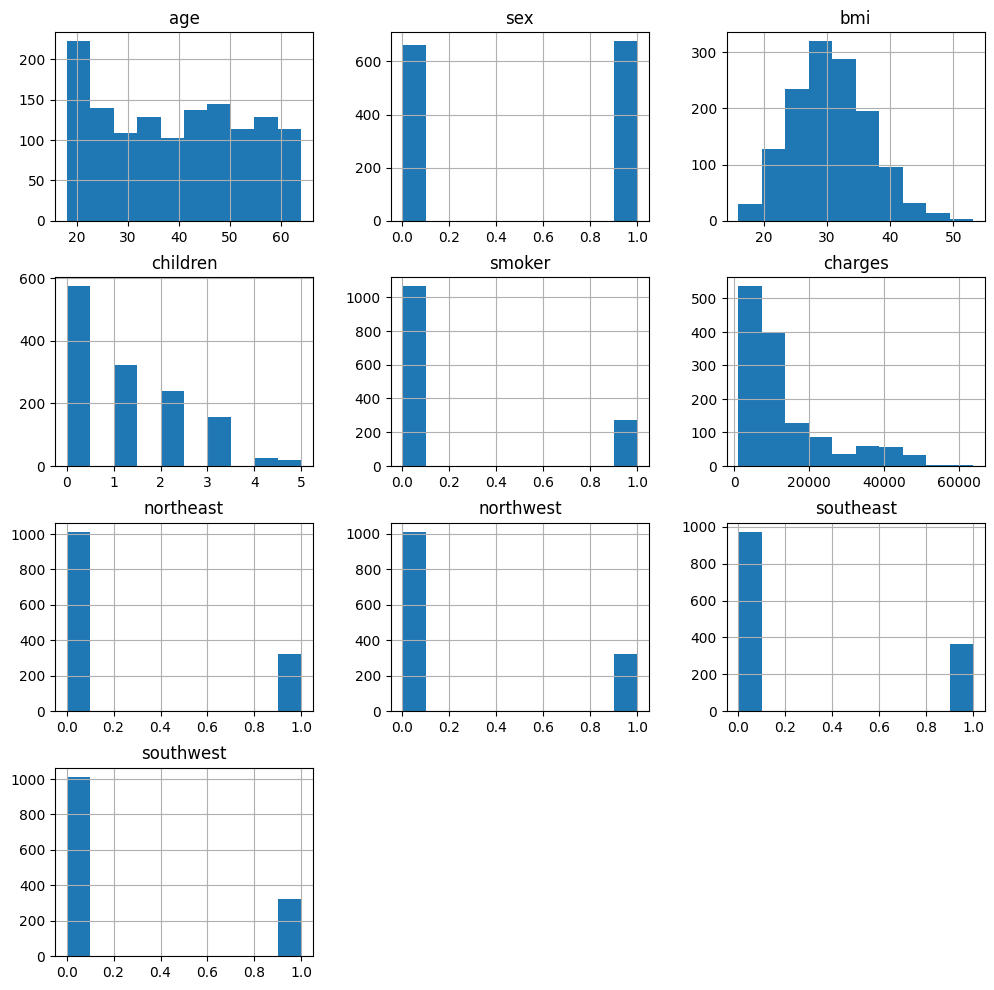

In [18]:
df.hist(figsize = (12,12))

<Axes: >

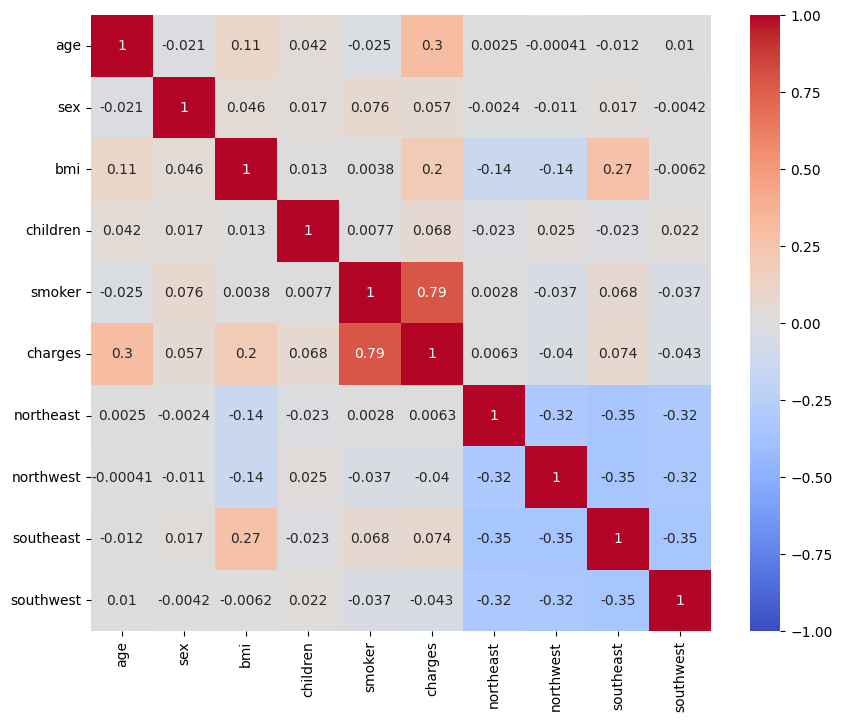

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True, cmap ="coolwarm", vmin = -1, vmax= 1)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

X= df.drop("charges", axis=1)
y= df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
model = RandomForestRegressor(n_jobs=-1)

model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [23]:
model.score(X_test, y_test)

0.8656232698740771

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

4567.473797851708

In [27]:
df.charges.std()

12110.011236694001

In [28]:
df.charges.median()

9382.033

Text(0.5, 1.0, 'Prediction vs Truth')

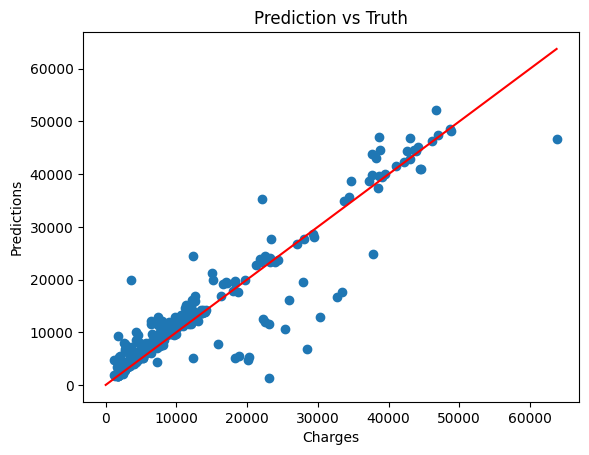

In [29]:
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color = "red")
plt.xlabel("Charges")
plt.ylabel("Predictions")
plt.title("Prediction vs Truth")

Text(0.5, 1.0, 'Feature Importances')

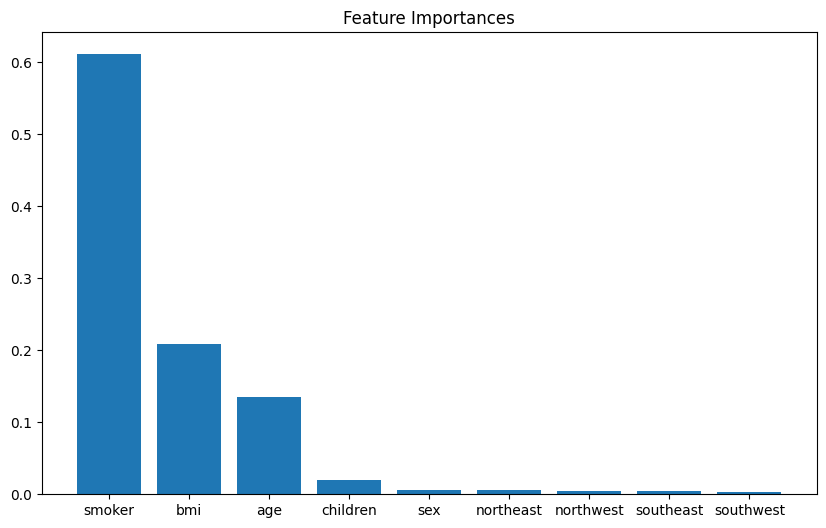

In [30]:
feature_importances = sorted(zip(model.feature_names_in_, model.feature_importances_),key= lambda x: x[1], reverse=True)
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances])
plt.title("Feature Importances")

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [None,2,5],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [1,2,4,6]
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=3)

In [32]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8]})

In [33]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 6}

In [34]:
model = grid_search.best_estimator_

In [35]:
model

RandomForestRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=6,
                      n_jobs=-1)

In [36]:
model.score(X_test, y_test)

0.8799766726324307